Exploratory Data Analysis for House Prices Data Set

Dataset obtained from: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code 

Fragments of code were obtained from  https://www.kaggle.com/code/nutkanibloch/eda-on-numerical-data-a-beginner-s-way 

02/02/2023

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#Import dataset
df = pd.read_csv('train.csv', index_col=0) #id column will be used as index column in dataframe
pd.set_option('display.max_rows', 120)
df = pd.DataFrame(df)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
#Obtain column datatypes
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [27]:
#Finding missing values
missing=df.isnull().sum()
missing=missing[missing>0] # Extracting those Columns having missing value Greater Than Zero
missing_above=missing[missing>(40/100)*1450] #we will drop those columns having more than 40% missing values

print(f'The following columns have more than 40% missing values:\n{missing_above}')

The following columns have more than 40% missing values:
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


<AxesSubplot:title={'center':'Count of missing values'}>

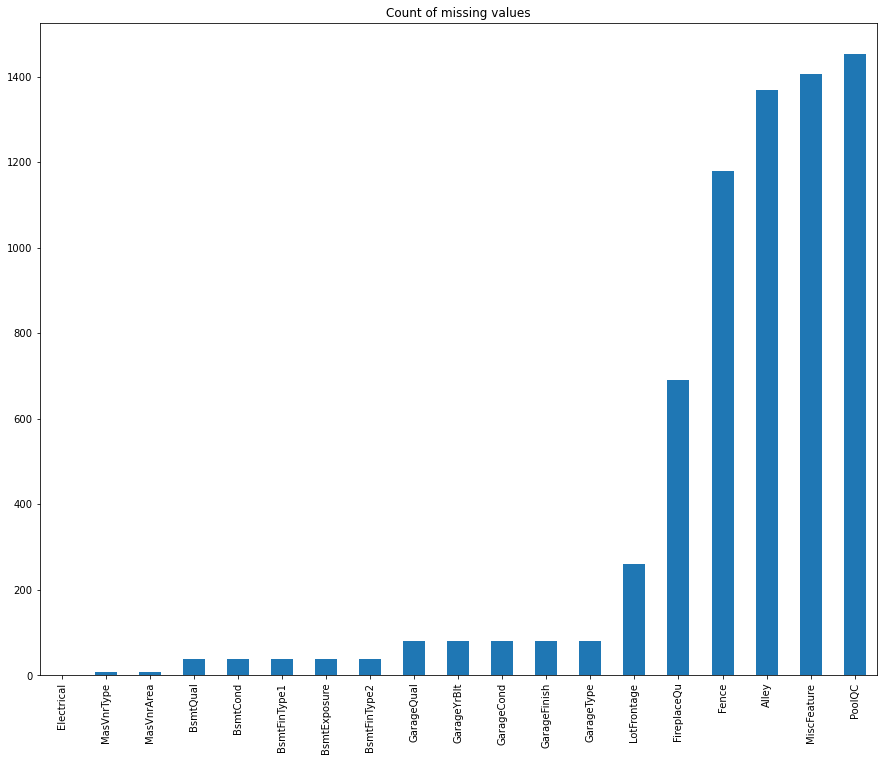

In [64]:
#Graph count of missing values
missing.sort_values(inplace=True)
plt.figure(figsize=(15,12))
plt.title("Count of missing values")
missing.plot.bar()

Separating variables according to datatype for better anaylisis

In [40]:
#Make lists of variables based on their datatypes 
integers = df.select_dtypes('int64')
objects = df.select_dtypes('object')
floats = df.select_dtypes('float64')

EDA for numerical variables (integers)

In [41]:
integers.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

1. Analyzing correlation between numeric variables and SalesPrice

In [45]:
#Get correlation matrix of numerical variables
cor_matrix = integers.corr()
print(cor_matrix)

               MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass       1.000000 -0.139781     0.032628    -0.059316   0.027850   
LotArea         -0.139781  1.000000     0.105806    -0.005636   0.014228   
OverallQual      0.032628  0.105806     1.000000    -0.091932   0.572323   
OverallCond     -0.059316 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt        0.027850  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd     0.040581  0.013788     0.550684     0.073741   0.592855   
BsmtFinSF1      -0.069836  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2      -0.065649  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF       -0.140759 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF     -0.238518  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF        -0.251758  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF         0.307886  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF

In [59]:
#Future analysis will be based on a prediction of SalesPrice Variable, we'll extract correlation between SalesPrice and the rest of numerical variables
cor_sale = cor_matrix['SalePrice'].sort_values(ascending=False)
print(cor_sale)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


<AxesSubplot:title={'center':'Correlation between numerical variables and SalePrice'}>

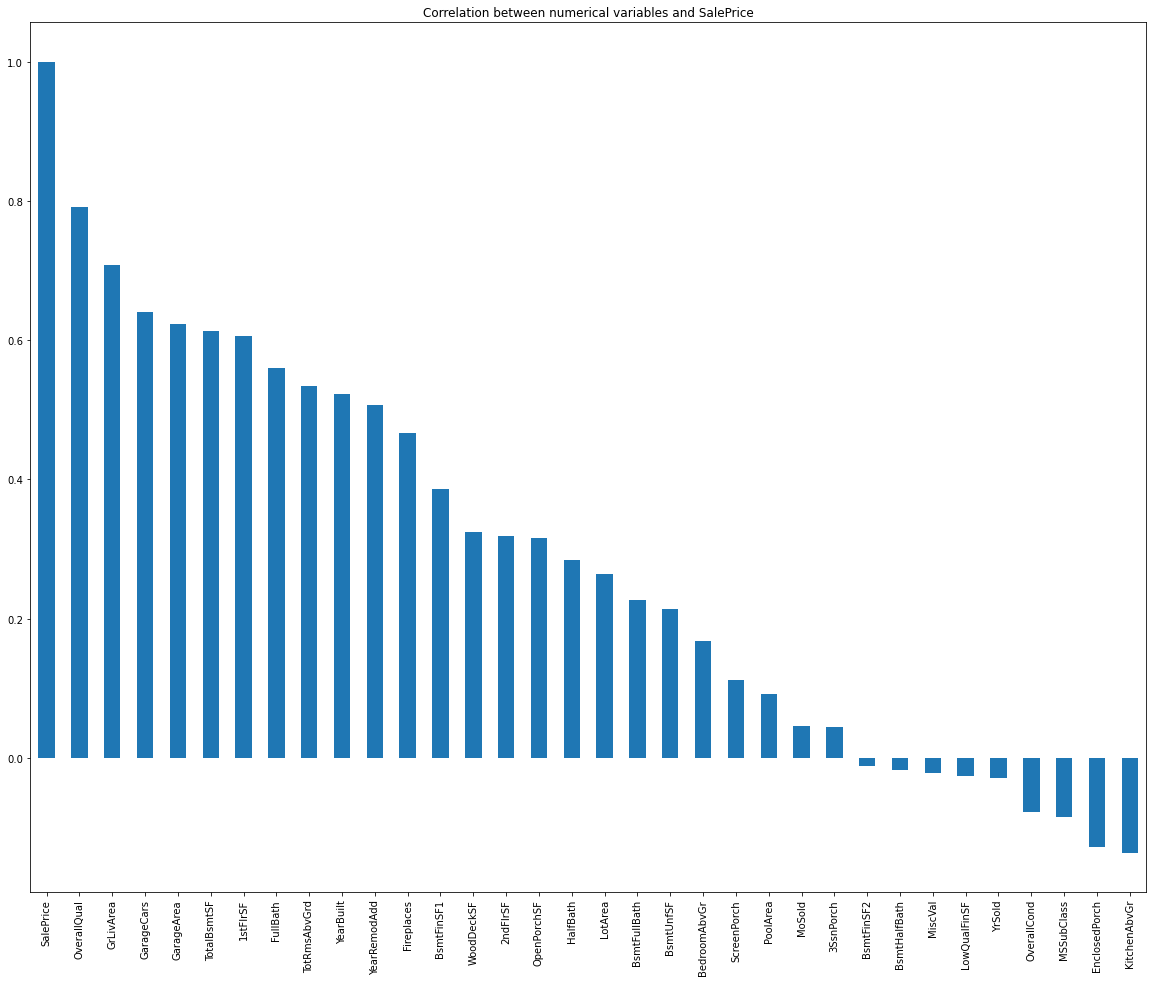

In [62]:
#Plot correlation with SalePrice
plt.figure(figsize=(20,16))
plt.title("Correlation between numerical variables and SalePrice")
cor_sale.plot.bar()

In [56]:
#We'll consider correlation to be poor when it's under .33
poor_cor = cor_matrix['SalePrice'] <.33
poor_cor = poor_cor[poor_cor]
print(f'The following variables display poor correlation with SalePrice:\n{poor_cor}')

The following variables display poor correlation with SalePrice:
MSSubClass       True
LotArea          True
OverallCond      True
BsmtFinSF2       True
BsmtUnfSF        True
2ndFlrSF         True
LowQualFinSF     True
BsmtFullBath     True
BsmtHalfBath     True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
Name: SalePrice, dtype: bool


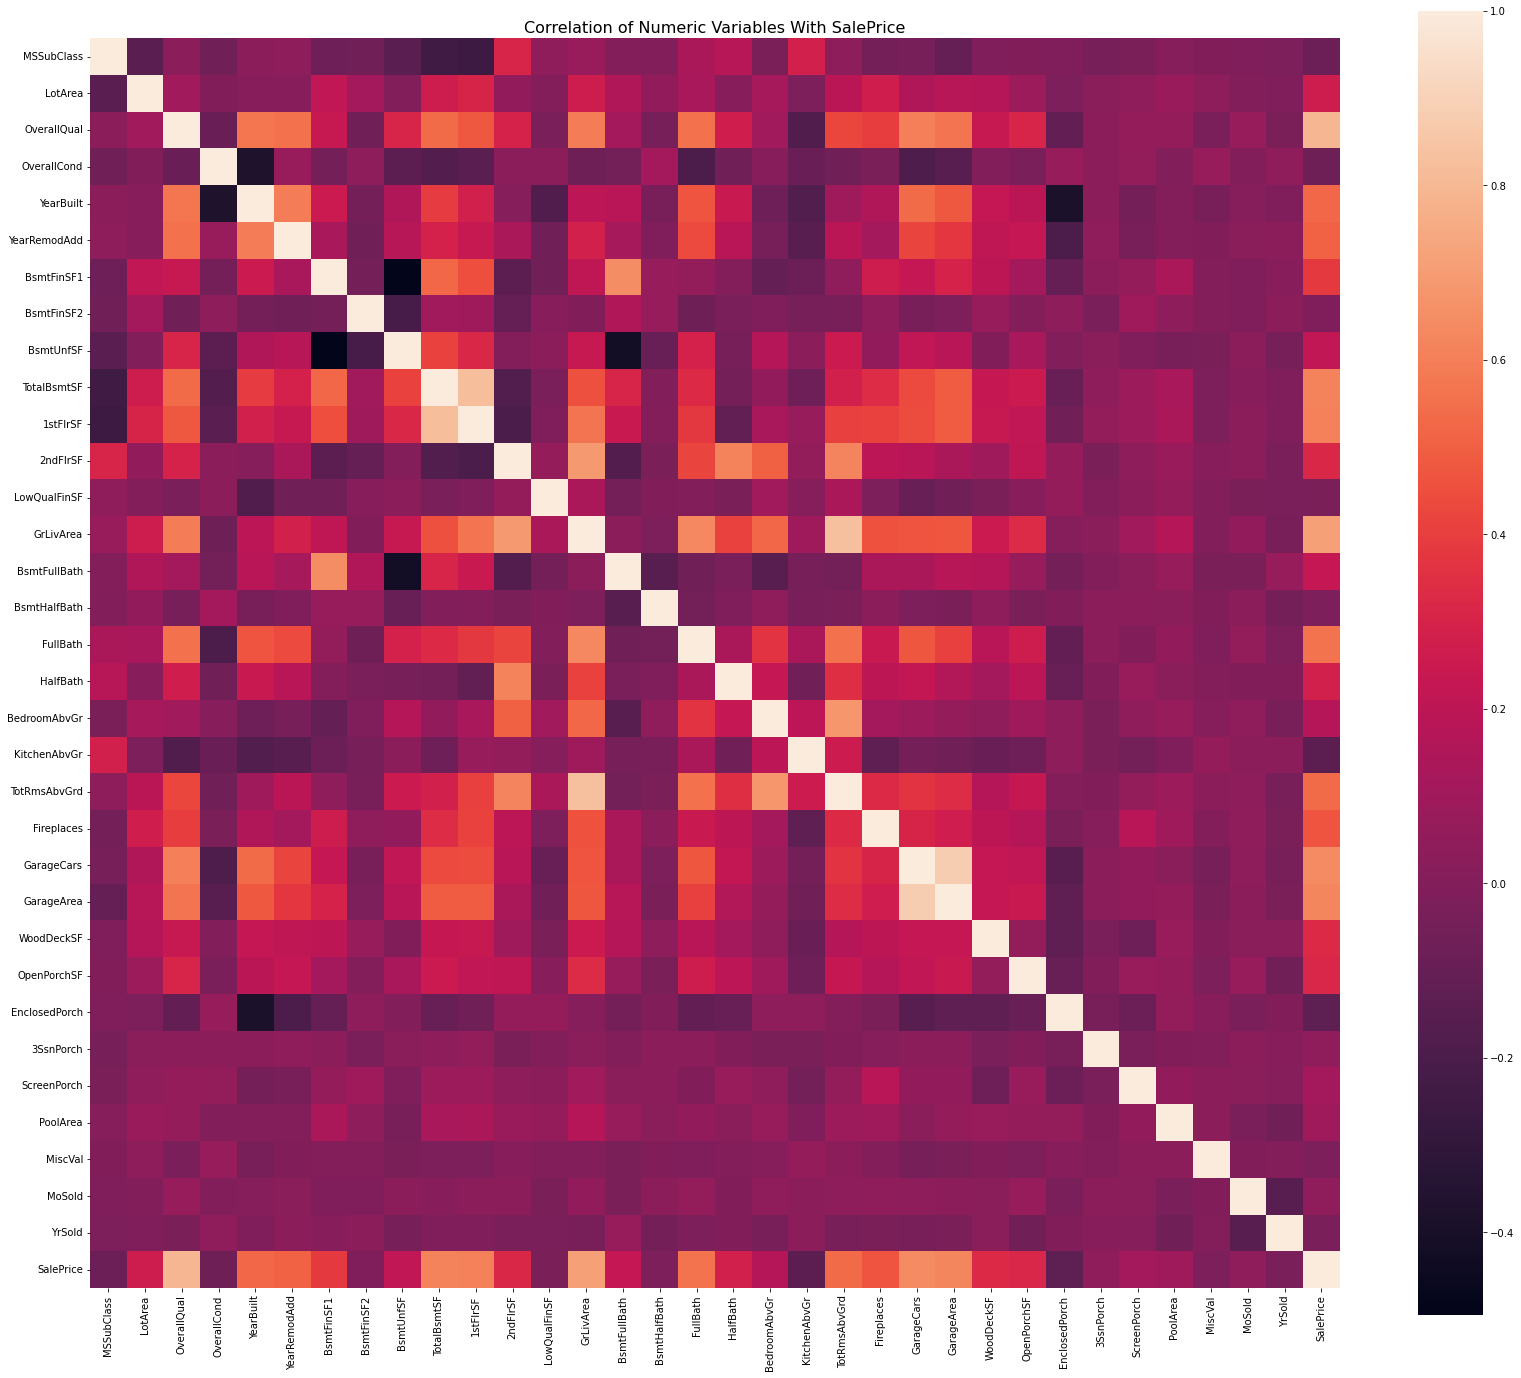

In [65]:
#Plot correlation matrix heatmap
f,ax=plt.subplots(figsize=(28,24))
plt.title('Correlation of Numeric Variables With SalePrice',size=16,y=1)
sns.heatmap(correlation,square=True)
plt.show()